# Weather 

In [32]:
# Dependencies 
import pandas as pd 
import matplotlib.pyplot as plt

import numpy as np
import random
from citipy import citipy
from datetime import datetime 
from config import weather_api_key
import requests
import time
from scipy.stats import linregress

In [2]:
# Create list for weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [3]:
# Create basic url for API
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [4]:
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=75a7ef83af48c1d25e4337a7d1c7198b


In [5]:
latitudes = np.random.uniform(-90, 90, size = 1500)
longitudes = np.random.uniform(-180, 180, size = 1500)
coordinates = zip(latitudes, longitudes)
coordinates

In [6]:
coordinates_lst = list(coordinates)

In [7]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates_lst:
    city = citipy.nearest_city(coordinate[0],coordinate[1])
    city_name = city.city_name
    country_name = city.country_code
    
    # Find unique cities to add to cities list
    if city_name not in cities:
        cities.append(city_name)
    
    # See cities and contries
    # print(f'{city_name}, {country_name}')

# Count amount of unique cities
len(cities)

587

In [8]:
# Loop through city Lists 
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 
    if (i % 50 == 0 and i >= 50):
        set_count += 1 
        record_count = 1 
    
    # Create URL for each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log URL, set, and record numbers for each city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1

# Make an API request for each city 
    try:
       
        # Parse the JSON data
        city_weather = requests.get(city_url).json()

        # Compile needed data
        city_city = city.title()
        city_country = city_weather['sys']['country']
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_hum = city_weather['main']['humidity']
        city_cloud = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']

        # Fill City Data list 
        city_data.append({"City": city_city,
                         "Country": city_country,
                         "Date": city_date,
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_hum,
                         "Cloudiness": city_cloud,
                         "Wind Speed": city_wind,
                         })
    #If an error occurs
    except: 
        print("City not found. Skipping")
        pass

    # Complete Data Retrieval    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | bonavista
Processing Record 6 of Set 1 | palasa
Processing Record 7 of Set 1 | inhambane
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | puerto carreno
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | kamenka
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | bambous virieux
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | ola
Processing Record 17 of Set 1 | nzega
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | kavieng
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | milledgeville
Processing Record 23 of Set 1 | ouadda
Processing Record 24 of Set 1 | dikson
Processing Record 25 of 

Processing Record 43 of Set 4 | mareeba
Processing Record 44 of Set 4 | san quintin
Processing Record 45 of Set 4 | narsaq
Processing Record 46 of Set 4 | geraldton
Processing Record 47 of Set 4 | ubinskoye
Processing Record 48 of Set 4 | thinadhoo
Processing Record 49 of Set 4 | lac du bonnet
Processing Record 50 of Set 4 | pisco
Processing Record 1 of Set 5 | mayo
Processing Record 2 of Set 5 | huron
Processing Record 3 of Set 5 | meulaboh
Processing Record 4 of Set 5 | alugan
Processing Record 5 of Set 5 | paamiut
Processing Record 6 of Set 5 | severnoye
Processing Record 7 of Set 5 | souillac
Processing Record 8 of Set 5 | ust-nera
Processing Record 9 of Set 5 | cidreira
Processing Record 10 of Set 5 | luena
Processing Record 11 of Set 5 | coihaique
Processing Record 12 of Set 5 | abha
Processing Record 13 of Set 5 | henties bay
Processing Record 14 of Set 5 | santa pola
Processing Record 15 of Set 5 | barahona
Processing Record 16 of Set 5 | mehamn
Processing Record 17 of Set 5 | 

Processing Record 34 of Set 8 | shelburne
Processing Record 35 of Set 8 | xapuri
Processing Record 36 of Set 8 | kollumerland
City not found. Skipping
Processing Record 37 of Set 8 | loharu
Processing Record 38 of Set 8 | serebryansk
Processing Record 39 of Set 8 | miraflores
Processing Record 40 of Set 8 | los llanos de aridane
Processing Record 41 of Set 8 | rabaul
Processing Record 42 of Set 8 | san jeronimo
Processing Record 43 of Set 8 | jatai
Processing Record 44 of Set 8 | lagoa
Processing Record 45 of Set 8 | marcona
City not found. Skipping
Processing Record 46 of Set 8 | pudozh
Processing Record 47 of Set 8 | nesbyen
Processing Record 48 of Set 8 | elban
Processing Record 49 of Set 8 | bathsheba
Processing Record 50 of Set 8 | ampere
Processing Record 1 of Set 9 | camana
Processing Record 2 of Set 9 | marzuq
Processing Record 3 of Set 9 | sioux lookout
Processing Record 4 of Set 9 | kasongo-lunda
Processing Record 5 of Set 9 | lolua
City not found. Skipping
Processing Record 

Processing Record 21 of Set 12 | udachnyy
Processing Record 22 of Set 12 | rochegda
Processing Record 23 of Set 12 | arenapolis
Processing Record 24 of Set 12 | bria
Processing Record 25 of Set 12 | antigonish
Processing Record 26 of Set 12 | ogaminana
Processing Record 27 of Set 12 | narrabri
Processing Record 28 of Set 12 | grand centre
City not found. Skipping
Processing Record 29 of Set 12 | moussoro
Processing Record 30 of Set 12 | ciras
City not found. Skipping
Processing Record 31 of Set 12 | yamoussoukro
Processing Record 32 of Set 12 | znamenskoye
Processing Record 33 of Set 12 | maniitsoq
Processing Record 34 of Set 12 | maningrida
Processing Record 35 of Set 12 | awbari
Processing Record 36 of Set 12 | west wendover
Processing Record 37 of Set 12 | phetchaburi
-----------------------------
Data Retrieval Complete      
-----------------------------


In [9]:
len(city_data)

534

In [10]:
# Add the data to a list in a dict then at the DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2022-04-04 20:45:31,22.0752,-159.3190,78.78,75,40,16.11
1,Lebu,CL,2022-04-04 20:45:31,-37.6167,-73.6500,57.61,74,42,17.00
2,Georgetown,MY,2022-04-04 20:43:45,5.4112,100.3354,78.73,93,20,8.05
3,Bethel,US,2022-04-04 20:45:32,41.3712,-73.4140,56.01,43,20,11.50
4,Bonavista,CA,2022-04-04 20:45:32,48.6499,-53.1147,35.28,81,96,11.92


In [11]:
# Create CSV file of DF
csv_weather_file = "weather_data/cities.csv"
# Export CSV file 
city_data_df.to_csv(csv_weather_file, index_label="City_ID")

## Plot Weather Data

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
hum = city_data_df["Humidity"]
clouds = city_data_df["Cloudiness"]
wind = city_data_df["Wind Speed"]

### Latitude vs Max Temperature

<function matplotlib.pyplot.show(close=None, block=None)>

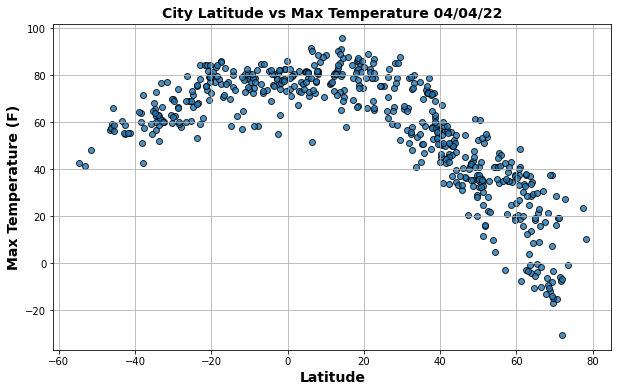

In [13]:
# Create Scatter Chart for Lat vs Max Temp
plt.subplots(figsize=(10,6))
plt.scatter(lat, max_temp, label='cities', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, marker='o')

# Add title and labels 
plt.title(f"City Latitude vs Max Temperature " + time.strftime('%x'),
          fontweight='semibold', fontsize=14)
plt.xlabel("Latitude", fontweight='semibold', fontsize=14)
plt.ylabel("Max Temperature (F)",fontweight='semibold', fontsize=14)

# Add Grid
plt.grid()

# Save Fig and show 
plt.savefig('weather_data/Fig1.png')
plt.show

### Latitude vs Humidity

<function matplotlib.pyplot.show(close=None, block=None)>

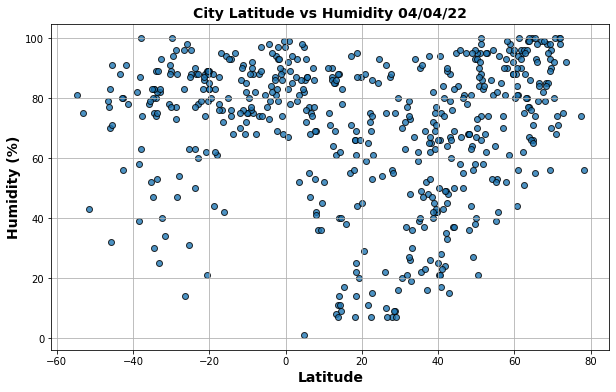

In [14]:
# Create Scatter Chart for Lat vs Humidity
plt.subplots(figsize=(10,6))
plt.scatter(lat, hum, label='cities', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, marker='o')

# Add title and labels 
plt.title(f"City Latitude vs Humidity " + time.strftime('%x'), fontweight='semibold', fontsize=14)
plt.xlabel("Latitude", fontweight='demi', fontsize=14)
plt.ylabel("Humidity (%)", fontweight=550, fontsize=14)

# Add Grid
plt.grid()

# Save Fig and show 
plt.savefig('weather_data/Fig2.png')
plt.show

### Latitude vs Cloudiness

<function matplotlib.pyplot.show(close=None, block=None)>

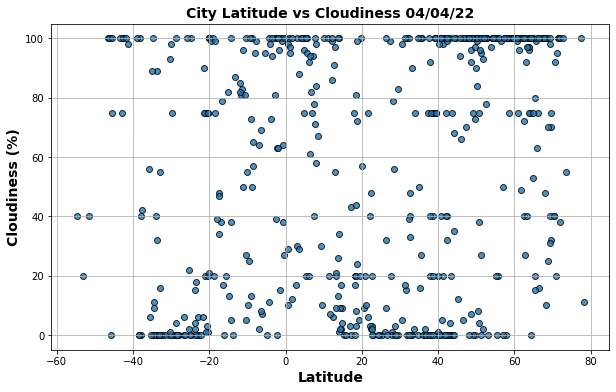

In [15]:
# Create Scatter Chart for Lat vs Cloudiness
plt.subplots(figsize=(10,6))
plt.scatter(lat, clouds, label='cities', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, marker='o')

# Add title and labels 
plt.title(f"City Latitude vs Cloudiness " + time.strftime('%x'),
          fontweight='semibold', fontsize=14)
plt.xlabel("Latitude", fontweight='semibold', fontsize=14)
plt.ylabel("Cloudiness (%)",fontweight='semibold', fontsize=14)

# Add Grid
plt.grid()

# Save Fig and show 
plt.savefig('weather_data/Fig3.png')
plt.show

### Latitude vs Wind Speed

<function matplotlib.pyplot.show(close=None, block=None)>

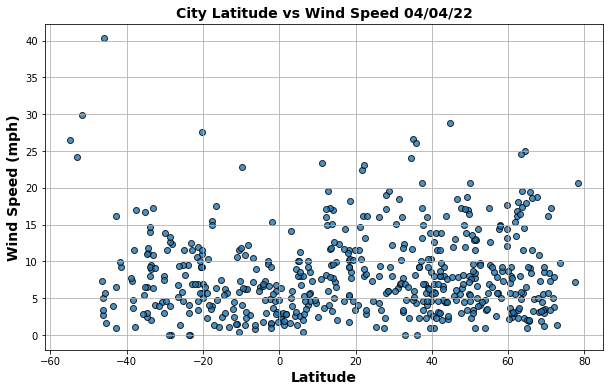

In [16]:
# Create Scatter Chart for Lat vs Wind Speed
plt.subplots(figsize=(10,6))
plt.scatter(lat, wind, label='cities', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, marker='o')

# Add title and labels 
plt.title(f"City Latitude vs Wind Speed " + time.strftime('%x'),
          fontweight='semibold', fontsize=14)
plt.xlabel("Latitude", fontweight='semibold', fontsize=14)
plt.ylabel("Wind Speed (mph)",fontweight='semibold', fontsize=14)

# Add Grid
plt.grid()

# Save Fig and show 
plt.savefig('weather_data/Fig4.png')
plt.show

## Linear Regression of Data by Hemisphere

### Linear Regression Function

In [17]:
# Create a linear regression function 
def plot_linear_regression(x_values, y_values, title, y_label, text_coord):
    
    # Get linear regression data 
    (slope, intercept, r_value, p_value, stderr) = linregress(x_values, y_values)
    lin_reg_lst = (slope, intercept, r_value, p_value, stderr)
    lin_reg_df = pd.DataFrame({"Slope":slope,
                               "Intercept":intercept,
                               "r Value":r_value,
                               "p Value":p_value,
                               "Std Error":stderr}, index=[0])
    
    print(lin_reg_df)
    # Calculate regress y_values using linear regression data above 
    regress_values = x_values * slope + intercept
    
    # Get equation for linear regression line 
    line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create Scatter plot with linear regression line 
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, color="r")
    
    # Annotate text for linear regression equation 
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
    

In [18]:
# Create Northern and Southern Hemisphere DFs
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [60]:
%matplotlib

Using matplotlib backend: Qt5Agg


### Linear Regression for Latitude vs Max Temperature by Hemisphere

In [61]:
# Create Northern Hemisphere Chart
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature",
                       "Max Temperature (F)", (5,40))
plt.savefig('weather_data/Fig5.png' )

      Slope  Intercept   r Value        p Value  Std Error
0 -1.165952  95.664676 -0.877267  2.141561e-118   0.033392


In [62]:
# Create Southern Hemisphere Chart
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature",
                       "Max Temperature (F)", (-30,36))
plt.savefig('weather_data/Fig6.png')

      Slope  Intercept   r Value       p Value  Std Error
0  0.519332  81.402775  0.693482  2.856152e-25   0.042004


### Linear Regression for Latitude vs Humidity by Hemisphere

In [63]:
# Create Northern Hemisphere Chart
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Linear Regression on the Northern Hemisphere \n for Humidity ",
                       "Humidity (%)", (0,5))
plt.savefig('weather_data/Fig7.png')

      Slope  Intercept   r Value       p Value  Std Error
0  0.344521  53.455588  0.278747  5.641973e-08   0.062129


In [64]:
# Create Southern Hemisphere Chart
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Linear Regression on the Southern Hemisphere \n for Humidity ",
                       "Humidity (%)", (-30,5))
plt.savefig('weather_data/Fig8.png')

      Slope  Intercept   r Value   p Value  Std Error
0  0.324202   84.50888  0.265574  0.000523   0.091623


### Linear Regression for Latitude vs Cloudiness by Hemisphere

In [65]:
# Create Northern Hemisphere Chart
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Linear Regression on the Northern Hemisphere \n for Cloudiness",
                       "Cloudiness (%)", (0,28))
plt.savefig('weather_data/Fig9.png')

      Slope  Intercept   r Value  p Value  Std Error
0  0.459174  40.215113  0.228604  0.00001   0.102351


In [66]:
# Create Southern Hemisphere Chart
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Linear Regression on the Southern Hemisphere \n for Cloudiness",
                       "Cloudiness (%)", (-55,8))
plt.savefig('weather_data/Fig10.png')

     Slope  Intercept   r Value   p Value  Std Error
0  0.50935  58.856319  0.169141  0.028879    0.23106


### Linear Regression for Latitude vs Wind Speed by Hemisphere

In [67]:
# Create Northern Hemisphere Chart
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Linear Regression on the Northern Hemisphere \n for Wind Speed",
                       "Wind Speed (mph)", (45,26))
plt.savefig('weather_data/Fig11.png')

      Slope  Intercept   r Value   p Value  Std Error
0  0.016946   7.805991  0.063005  0.228558    0.01405


In [68]:
# Create Southern Hemisphere Chart
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Linear Regression on the Southern Hemisphere \n for Wind Speed",
                       "Wind Speed (mph)", (-25,28))
plt.savefig('weather_data/Fig12.png')

      Slope  Intercept   r Value   p Value  Std Error
0 -0.130534     4.6235 -0.301987  0.000073    0.03208
